In [90]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.random.seed(0)

In [91]:
def generate_oe_matrix(variance_threshold_L = 0.85, variance_threshold_U = 1):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(5, 5) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.857765506988281 

[[35.28105 13.77435 11.22782 25.74568 44.20548]
 [13.77435 19.00177 16.05631 15.97298 10.64217]
 [11.22782 16.05631 15.22075  3.26833 13.08299]
 [25.74568 15.97298  3.26833  6.26135 15.96261]
 [44.20548 10.64217 13.08299 15.96261 45.39509]] 



#### Perform PCA on the Pearson correlation matrix <br>

In [92]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [93]:
print('explained variances')
print(explained_variances, '\n')
# print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
# print((V_Cx > 0) == (Vh > 0), '\n')

print("PCx")
print(V_Cx, '\n')
# print(V_Cx > 0, '\n')
print("P")
print(Vh, '\n')
# print(Vh > 0, '\n')

explained variances
[0.89296 0.08117 0.02575 0.00011 0.     ] 

PCx
[[-0.96895  0.91888  0.27992 -0.52469 -0.93729]
 [-0.01712 -0.01388  0.14884  0.03993  0.02619]
 [-0.00207  0.02609 -0.00927  0.04164  0.00164]
 [-0.00017 -0.00005 -0.00005  0.00001  0.00011]
 [ 0.       0.      -0.       0.       0.     ]] 

P
[[-0.558    0.52916  0.1612  -0.30216 -0.53976]
 [-0.10844 -0.08791  0.94286  0.25298  0.16589]
 [-0.04133  0.52104 -0.18505  0.83156  0.03275]
 [-0.79449 -0.22159 -0.2125   0.03147  0.52301]
 [ 0.20967  0.62584  0.07497 -0.39015  0.63759]] 



In [94]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.      -0.894   -0.28734  0.56174  0.9262 ]
 [-0.894    1.       0.11765 -0.3036  -0.8872 ]
 [-0.28734  0.11765  1.       0.18296 -0.02662]
 [ 0.56174 -0.3036   0.18296  1.       0.70368]
 [ 0.9262  -0.8872  -0.02662  0.70368  1.     ]] 

V_Cx[0]
[-0.96895  0.91888  0.27992 -0.52469 -0.93729] 

Vh[0]
[-0.558    0.52916  0.1612  -0.30216 -0.53976] 

cov_x
[[ 0.54275 -0.51227 -0.17191  0.28672  0.52001]
 [-0.51227  0.50106  0.13022 -0.25946 -0.49745]
 [-0.17191  0.13022  0.18718 -0.05463 -0.12673]
 [ 0.28672 -0.25946 -0.05463  0.20327  0.2912 ]
 [ 0.52001 -0.49745 -0.12673  0.2912   0.51037]] 

cov_x_sum
[2.0336593026958516, 1.900457224041352, 0.6706720704267439, 1.0952897792054457, 1.9457638062613445] 



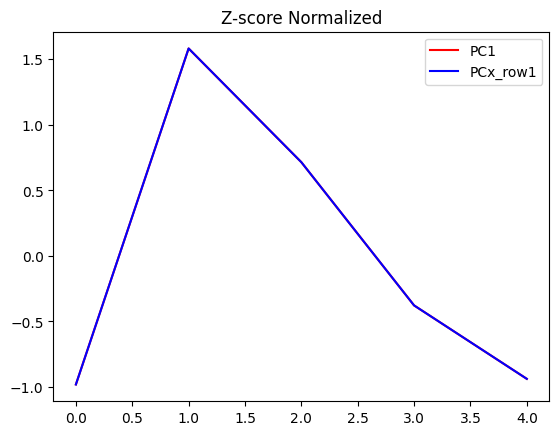

In [95]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
# plt.plot(cov_x_selected_Norm, c="black")


plt.title("Z-score Normalized")
plt.legend(["PC1", "PCx_row1"])

In [96]:
plt.clf()

<Figure size 640x480 with 0 Axes>

### Check the plot without Normalization on the Pearson correlation matrix

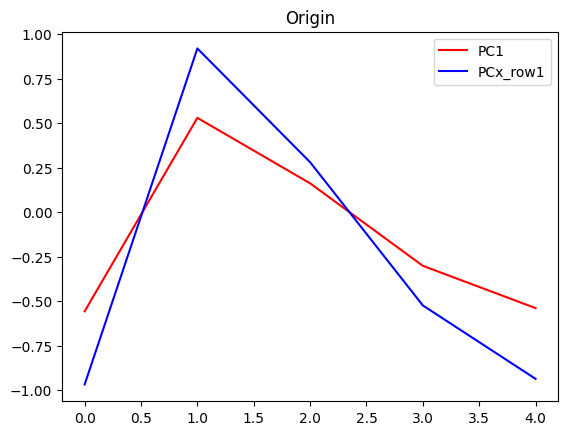

In [97]:

plt.plot(Vh[0], c="red")
plt.plot(V_Cx[0], c="blue")
# plt.plot(cov_x_selected, c="black")

plt.title("Origin")
plt.legend(["PC1", "PCx_row1"])

In [98]:
plt.clf()

<Figure size 640x480 with 0 Axes>

#### Heatmap plot

<Axes: >

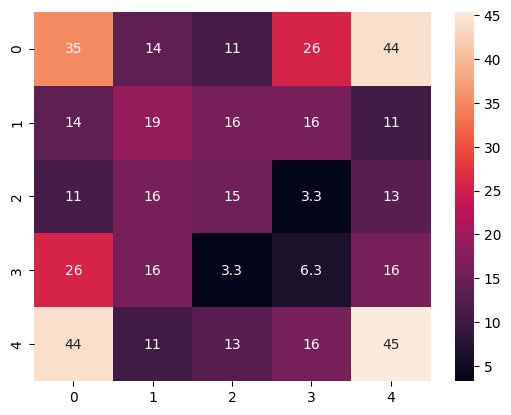

In [99]:
sns.heatmap(oe, annot=True)

<Axes: >

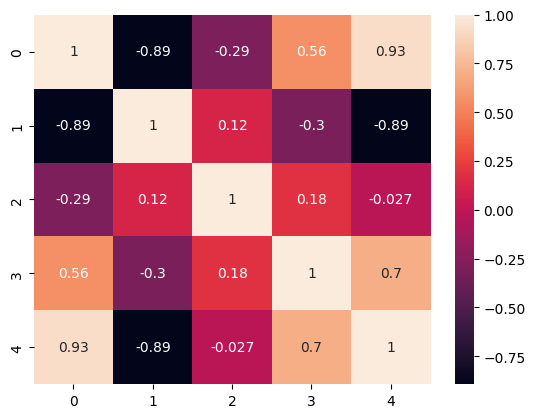

In [100]:
sns.heatmap(corr_oe, annot=True)

In [103]:
# sns.heatmap(corr_oe_zero, annot=True)

<Axes: >

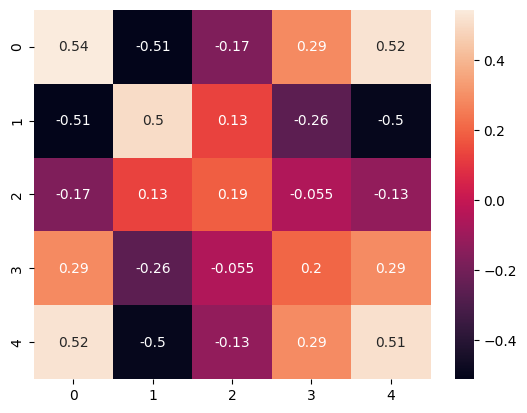

In [102]:
sns.heatmap(cov_x, annot=True)